## Task-03 Cats and Dogs image classification using SVM

The major advantage of using SVMs is that they can effectively hndle high dimensional data,such as images. Additionally, SVMs leass pronre to overfitting rhan other algorithms such as nural networks.

In [143]:
#Importing required libraries
import pandas as pd
import numpy as np
import os
import cv2
import matplotlib.pyplot as plt
import time
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV

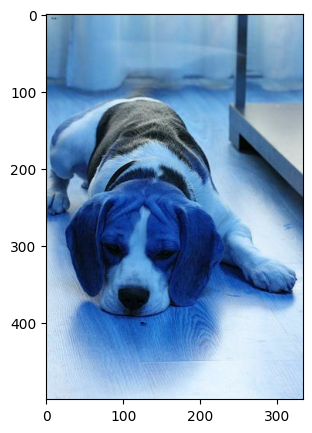

In [144]:
#reading/extracting the data
plt.figure(figsize=(10,5))
img=r"C:\\Users\\sc\\Desktop\\Dataset\\dog\\beagle_112_jpg.rf.1eb40b396869a196e92a82f4a28c1d8b.jpg"
plt.imshow(cv2.imread(img))

In [145]:
#converting image to matrix
img_path=r"C:\\Users\\sc\\Desktop\\Dataset\\dog\\beagle_112_jpg.rf.1eb40b396869a196e92a82f4a28c1d8b.jpg"
img=cv2.imread(img_path)
img

array([[[153, 185, 204],
        [155, 187, 206],
        [156, 189, 208],
        ...,
        [155, 191, 221],
        [155, 191, 221],
        [153, 191, 221]],

       [[151, 183, 202],
        [148, 180, 199],
        [154, 187, 206],
        ...,
        [155, 191, 221],
        [155, 191, 221],
        [153, 191, 221]],

       [[152, 185, 204],
        [143, 176, 195],
        [149, 182, 201],
        ...,
        [154, 190, 220],
        [154, 190, 220],
        [152, 190, 220]],

       ...,

       [[208, 225, 246],
        [209, 226, 247],
        [212, 229, 248],
        ...,
        [181, 209, 244],
        [183, 211, 246],
        [188, 216, 251]],

       [[209, 226, 247],
        [210, 227, 248],
        [211, 228, 247],
        ...,
        [180, 208, 243],
        [181, 209, 244],
        [184, 212, 247]],

       [[210, 227, 248],
        [210, 227, 248],
        [211, 228, 247],
        ...,
        [179, 207, 242],
        [178, 206, 241],
        [181, 209, 244]]

In [146]:
img.shape

(500, 333, 3)

In [147]:
#resize matrix
img_resize=cv2.resize(img,(15,15))
print(img_resize.shape)


(15, 15, 3)


In [148]:
img_resize

array([[[124, 164, 193],
        [ 78, 126, 171],
        [ 98, 154, 195],
        [112, 171, 217],
        [131, 179, 213],
        [117, 170, 203],
        [138, 177, 209],
        [147, 186, 218],
        [141, 183, 213],
        [141, 181, 210],
        [160, 192, 216],
        [ 34,  54,  79],
        [138, 179, 202],
        [163, 193, 214],
        [154, 185, 211]],

       [[ 93, 139, 180],
        [ 78, 135, 188],
        [ 94, 146, 193],
        [106, 165, 215],
        [124, 176, 216],
        [124, 173, 211],
        [129, 175, 213],
        [135, 181, 222],
        [129, 179, 215],
        [135, 178, 213],
        [137, 180, 217],
        [ 30,  48,  73],
        [108, 155, 187],
        [142, 174, 202],
        [123, 169, 203]],

       [[ 47,  96, 140],
        [ 78, 132, 187],
        [ 80, 137, 188],
        [ 95, 157, 211],
        [100, 145, 187],
        [ 75, 106, 135],
        [ 71, 109, 141],
        [ 81, 131, 181],
        [ 53, 102, 152],
        [ 80, 126, 17

In [149]:
#flatten the matrix/vector
flatten_img=img_resize.flatten()
flatten_img

array([124, 164, 193,  78, 126, 171,  98, 154, 195, 112, 171, 217, 131,
       179, 213, 117, 170, 203, 138, 177, 209, 147, 186, 218, 141, 183,
       213, 141, 181, 210, 160, 192, 216,  34,  54,  79, 138, 179, 202,
       163, 193, 214, 154, 185, 211,  93, 139, 180,  78, 135, 188,  94,
       146, 193, 106, 165, 215, 124, 176, 216, 124, 173, 211, 129, 175,
       213, 135, 181, 222, 129, 179, 215, 135, 178, 213, 137, 180, 217,
        30,  48,  73, 108, 155, 187, 142, 174, 202, 123, 169, 203,  47,
        96, 140,  78, 132, 187,  80, 137, 188,  95, 157, 211, 100, 145,
       187,  75, 106, 135,  71, 109, 141,  81, 131, 181,  53, 102, 152,
        80, 126, 174,  90, 141, 181,  28,  57,  97,  66, 115, 155, 107,
       150, 187,  90, 140, 187,  96, 155, 211,  98, 158, 213,  98, 156,
       215, 173, 211, 236,  96, 114, 121, 161, 172, 170, 149, 162, 160,
       106, 173, 230, 111, 176, 227, 100, 166, 219, 101, 164, 224,  28,
        59,  93, 147, 175, 193, 143, 165, 185, 138, 161, 182, 13

In [150]:
flatten_img.shape

(675,)

In [151]:
#Loading,preprocessing and labelling datasets
dir='C:\\Users\\sc\\Desktop\\Dataset'
categories=['Cat','Dog']
data=[]
features=[]
labels=[]
for category_idx,category in enumerate(categories):
    for file in os.listdir(os.path.join(dir,category)):
        img_path=os.path.join(dir,category,file)
        print(img_path)
        img=cv2.imread(img_path)
        img=cv2.resize(img,(15,15))
        img_normalized=img/255.0
        imag_flatten=img_normalized.flatten()
        features.append(imag_flatten)
        labels.append(category_idx)

C:\Users\sc\Desktop\Dataset\Cat\Abyssinian_127_jpg.rf.b2553880d73a78e26e396fe7775f31be.jpg
C:\Users\sc\Desktop\Dataset\Cat\Abyssinian_131_jpg.rf.3aeee0801499f335e3a59b51189e1351.jpg
C:\Users\sc\Desktop\Dataset\Cat\Abyssinian_149_jpg.rf.b6b4a72a93f8bc2b239b18c5d181190c.jpg
C:\Users\sc\Desktop\Dataset\Cat\Abyssinian_15_jpg.rf.7bc44eeb9865e35cb1d5f9ef4f53b381.jpg
C:\Users\sc\Desktop\Dataset\Cat\Abyssinian_167_jpg.rf.1d367cb1cf82c1e5ebda79fda928cee5.jpg
C:\Users\sc\Desktop\Dataset\Cat\Bengal_103_jpg.rf.bb684501a53abf381a6bf07f9cd2243c.jpg
C:\Users\sc\Desktop\Dataset\Cat\Bengal_109_jpg.rf.aed42b8605ef92b579992d02e2e2cc4c.jpg
C:\Users\sc\Desktop\Dataset\Cat\Bengal_116_jpg.rf.8c6280ad977c6c749da4d35156e49286.jpg
C:\Users\sc\Desktop\Dataset\Cat\Bengal_13_jpg.rf.7c75131d257406a75d8d676dd9b5f5f7.jpg
C:\Users\sc\Desktop\Dataset\Cat\Bengal_145_jpg.rf.3dadbfbb39437890fc249f7edb37cb2f.jpg
C:\Users\sc\Desktop\Dataset\Cat\Bengal_150_jpg.rf.05c93a40014062c5ae66bae50a857aca.jpg
C:\Users\sc\Desktop\Datas

In [152]:
features=np.asarray(features)
labels=np.asarray(labels)

In [153]:
#spliting the dataset into training and testing data
X_train,X_test,y_train,y_test=train_test_split(features,labels,shuffle=True,test_size=0.2,random_state=42)

In [154]:
#Creating Pipeline using PCA and SVM
pca=PCA(n_components=2)
model=SVC()
pca=PCA(n_components=2,random_state=42)
pipeline=Pipeline([
    ('pca',pca),
    ('svm',model)
])

In [155]:
#
param_grid={
    'pca__n_components': [2,1,0.9,0.8],
    'svm__kernel':['linear','rbf','poly','sigmoid'],
}

In [156]:
start_time=time.time()


grid_search=GridSearchCV(pipeline, param_grid, cv=70, verbose=4)
grid_search.fit(X_train,y_train)

end_time=time.time()

Fitting 70 folds for each of 16 candidates, totalling 1120 fits
[CV 1/70] END pca__n_components=2, svm__kernel=linear;, score=0.500 total time=   0.0s
[CV 2/70] END pca__n_components=2, svm__kernel=linear;, score=0.500 total time=   0.0s
[CV 3/70] END pca__n_components=2, svm__kernel=linear;, score=0.500 total time=   0.0s
[CV 4/70] END pca__n_components=2, svm__kernel=linear;, score=0.500 total time=   0.0s
[CV 5/70] END pca__n_components=2, svm__kernel=linear;, score=0.500 total time=   0.0s
[CV 6/70] END pca__n_components=2, svm__kernel=linear;, score=0.500 total time=   0.0s
[CV 7/70] END pca__n_components=2, svm__kernel=linear;, score=0.750 total time=   0.0s
[CV 8/70] END pca__n_components=2, svm__kernel=linear;, score=0.750 total time=   0.0s
[CV 9/70] END pca__n_components=2, svm__kernel=linear;, score=0.750 total time=   0.0s
[CV 10/70] END pca__n_components=2, svm__kernel=linear;, score=0.750 total time=   0.0s
[CV 11/70] END pca__n_components=2, svm__kernel=linear;, score=0.

In [157]:
del X_train
del y_train

In [158]:
best_pipeline=grid_search.best_estimator_
best_params=grid_search.best_params_
best_score=grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Score:", best_score)

Best Parameters: {'pca__n_components': 1, 'svm__kernel': 'rbf'}
Best Score: 0.6666666666666664


In [159]:
#Evaluation on test data
accuracy=best_pipeline.score(X_test,y_test)
print("Accuracy:",accuracy)

Accuracy: 0.6727272727272727


In [160]:
y_pred=best_pipeline.predict(X_test)

#Classification report
target_names=['Cat','Dog']
classification_rep=classification_report(y_test,y_pred,target_names=target_names)
print("Classification Report:\n",classification_rep)

Classification Report:
               precision    recall  f1-score   support

         Cat       1.00      0.05      0.10        19
         Dog       0.67      1.00      0.80        36

    accuracy                           0.67        55
   macro avg       0.83      0.53      0.45        55
weighted avg       0.78      0.67      0.56        55



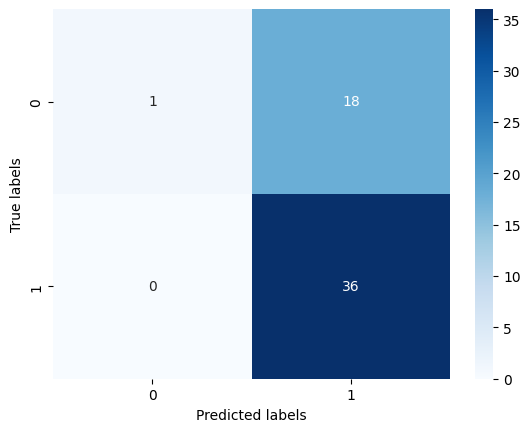

In [161]:
#Confuion matrix
cm=confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True,fmt="d",cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()
